In [3]:
# 패키지 임포트
import numpy as np
import pandas as pd
import scipy.stats as ss
import os 
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install plotly
import plotly.offline as off
import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐 방지

In [7]:
# 거래금액, 전용면적 데이터 컬럼명 변경
train_data=pd.read_csv('train_data.csv', encoding='CP949')
train_data.rename(columns = {'거래금액(만원)':'거래금액', '전용면적(㎡)':'전용면적'}, inplace=True)
train_data['계약년도'] = train_data['계약년월'].map(lambda x : str(x)[:4])
train_data['계약월'] = train_data['계약년월'].map(lambda x : int(str(x)[4:]))
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,계약년도,계약월
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,2018,1
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,2018,1
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,2018,1
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,2018,3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,2018,4
...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,2020,8
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,2020,7
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,2020,12
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,2020,9


In [11]:
train_years=train_data[['건축년도','계약년월','계약년도','계약월']]

In [13]:
#계약년월별 건축년도 count
#ex)2020년 1월에 거래된 아파트의 건축년도 분포도를 알고 싶다.
group_2018=train_years.groupby(['계약년월','계약월','건축년도'])
group_2018.size().reset_index(name='counts')

,계약년월,계약월,건축년도,counts
0,201801,1,1961,1
1,201801,1,1968,6
2,201801,1,1969,4
3,201801,1,1970,11
4,201801,1,1971,45
...,...,...,...,...
1889,202012,12,2017,111
1890,202012,12,2018,138
1891,202012,12,2019,163
1892,202012,12,2020,244


In [14]:
group=train_years.groupby(['계약년월','계약년도','건축년도'])
construction_month_count=group.size().reset_index(name='counts')
df_construction_month_count=pd.DataFrame(construction_month_count)
# df_construction_month_count
df_construction_month_count_2018=df_construction_month_count.groupby('계약년도').get_group('2018')
df_construction_month_count_2019=df_construction_month_count.groupby('계약년도').get_group('2019')
df_construction_month_count_2020=df_construction_month_count.groupby('계약년도').get_group('2020')
df_construction_month_count_2018

,계약년월,계약년도,건축년도,counts
0,201801,2018,1961,1
1,201801,2018,1968,6
2,201801,2018,1969,4
3,201801,2018,1970,11
4,201801,2018,1971,45
...,...,...,...,...
608,201812,2018,2014,43
609,201812,2018,2015,21
610,201812,2018,2016,25
611,201812,2018,2017,9


Text(0, 0.5, '2020')

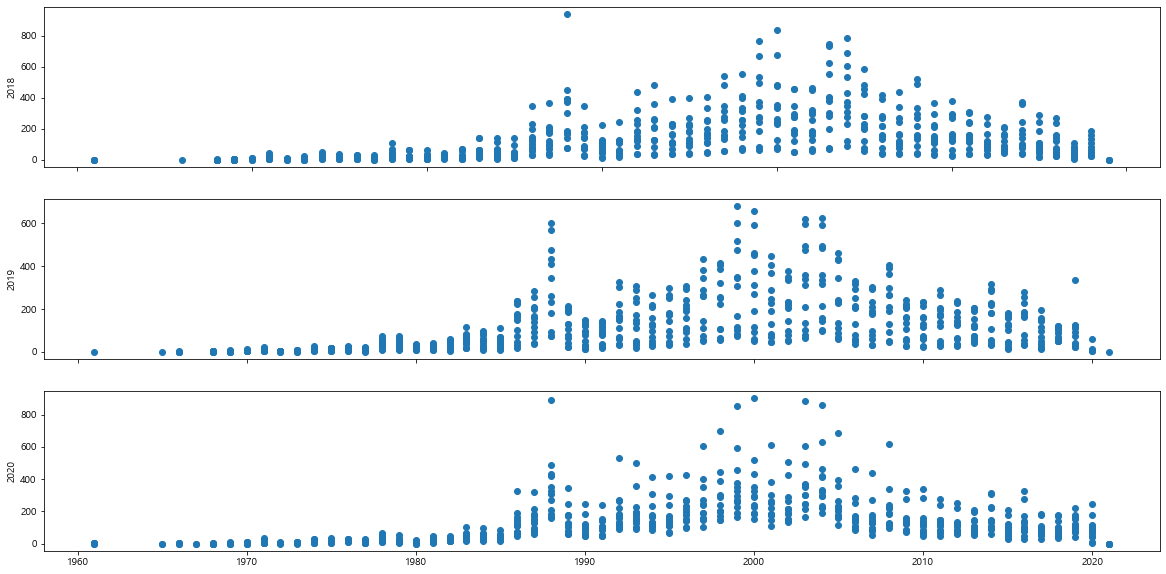

In [16]:
#2018~2020 월별 건축년도 분포도
#월별 분포도를 보여줘야 하는 것 아닌가. 
fig=plt.figure(figsize=(20, 10))
plt.subplot(3,1,1)
plt.scatter(df_construction_month_count_2018['건축년도'],df_construction_month_count_2018['counts'])
plt.ylabel('2018')
plt.xticks(visible=False)

plt.subplot(3,1,2)
plt.scatter(df_construction_month_count_2019['건축년도'],df_construction_month_count_2019['counts'])
plt.ylabel('2019')
plt.xticks(visible=False)

plt.subplot(3,1,3)
plt.scatter(df_construction_month_count_2020['건축년도'],df_construction_month_count_2020['counts'])
plt.ylabel('2020')

##### 구축이냐 신축이냐가 아닌 동일 아파트의 갯수가 얼마냐 더 많냐에 따라 비례적으로 계약건수 차이가 있음. 즉 건축년도와 계약 건수의 상관관계는 크지 않다.

Text(0.5, 0, '전용면적')

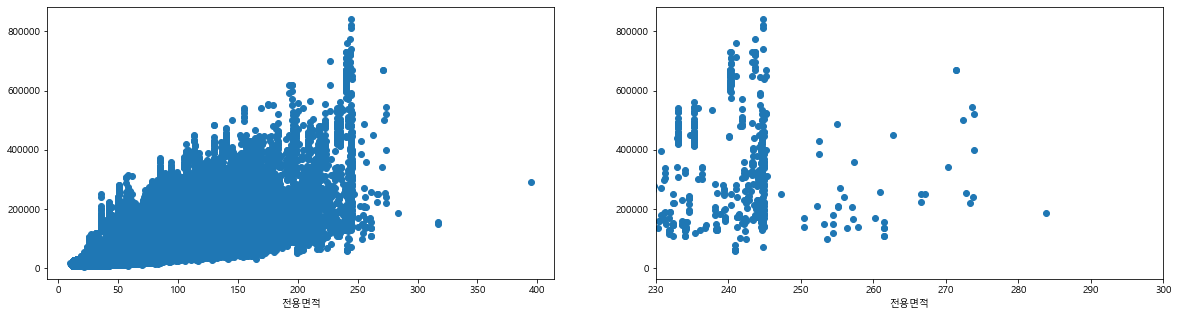

In [19]:

#거래금액 - 전용면적 분포도 확인 (12/26)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['전용면적'],train_data['거래금액'])
plt.xlabel('전용면적')

plt.subplot(1, 2, 2)
plt.scatter(train_data['전용면적'],train_data['거래금액'])
plt.xlim([230,300])
plt.xlabel('전용면적')

#### 230과 300 사이의 분포도 확인을 통해 70평 중반대의 아파트가 그 이후의 평수보다 거래 금액이 높다.
#### 전용면적이 늘어남에 따라 거래금액도 커져야 하는데 이유가 뭘까?